# Data Science Nanodegree by Udacity

## Project 1 Task:

Key Steps for Project
Feel free to be creative with your solutions, but do follow the CRISP-DM process in finding your solutions.

1) Pick a dataset.

2) Pose at least three questions related to business or real-world applications of how the data could be used.

3) Create a Jupyter Notebook, using any associated packages you'd like, to:

Prepare data:

- Gather necessary data to answer your questions
- Handle categorical and missing data
- Provide insight into the methods you chose and why you chose them
- Analyze, Model, and Visualize

Provide a clear connection between your business questions and how the data answers them.
4) Communicate your business insights:

- Create a Github repository to share your code and data wrangling/modeling techniques, with a technical audience in mind
- Create a blog post to share your questions and insights with a non-technical audience

# Data Science Process: CRISP-DM

CRISP-DM is a Cross Industry Standard Process for Data Mining, has 6 major phases:

1) Business Understanding 
    - Q1.The most popular listing by room type in Boston
    - Q2.The most popular neighbourhood in Boston
    - Q3.Predicting the price
2) Data Understanding 
    - Have a quick look at the data available and understand its features    
3) Prepare Data and 4) Model Data will cover following:
    - Gather necessary data to answer your questions
    - Handle categorical and missing data
    - Provide insight into the methods you chose and why you chose them
    - Analyze, Model, and Visualize
5) Evaluate the Results against business questions at 1)
6) Deployement 
    - The deployement of the project will be represented as an effective communication of the results & findings in a form of a blog post @medium

In [1]:
#import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error,confusion_matrix, classification_report
import seaborn as sns
%matplotlib inline

In [2]:
#import data

listing_df =  pd.read_csv(r'C:\Users\User\Desktop\ML\Data Science Nano Degree\Lesson1 + Notebooks\Project1\data Boston\listings.csv')
calendar_df = pd.read_csv(r'C:\Users\User\Desktop\ML\Data Science Nano Degree\Lesson1 + Notebooks\Project1\data Boston\calendar.csv')
reviews_df = pd.read_csv(r'C:\Users\User\Desktop\ML\Data Science Nano Degree\Lesson1 + Notebooks\Project1\data Boston\reviews.csv')

# Steps 1)Business and 2)Data Understanding; 3) Data Preparation

Let us make a quick view of the data in order to understand it more and in order to come up with Business Questions that I will form and try to answer with a given data. 

# Listing Dataset

In [5]:
#listing all columns
pd.options.display.max_columns = 100
listing_df.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

In [4]:
#more close view at the existing features, to initiate further analysis 
listing_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [5]:
listing_df.shape

(3585, 95)

In [6]:
listing_df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,3575.000000,3576.000000,56.000000,3585.000000,3585.000000,3.585000e+03,0.0,3585.00000,3585.000000,3585.000000,3585.000000,3585.000000,2772.000000,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,1.255944,1.609060,858.464286,1.429847,3.171269,2.872584e+04,NaN,8.64993,21.833194,38.558159,179.346444,19.044630,91.916667,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,8.516813e-01,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,0.753060,1.011745,608.874310,1.056787,8.874133,1.670136e+06,NaN,10.43533,21.860966,33.158272,142.136180,35.571658,9.531686,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,NaN,0.00000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,1.000000,1.000000,415.000000,1.000000,1.000000,3.650000e+02,NaN,0.00000,0.000000,0.000000,19.000000,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,1.000000,1.000000,825.000000,1.000000,2.000000,1.125000e+03,NaN,4.00000,16.000000,37.000000,179.000000,5.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,2.000000,2.000000,1200.000000,1.000000,3.000000,1.125000e+03,NaN,15.00000,40.000000,68.000000,325.000000,21.000000,98.250000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,5.000000,16.000000,2400.000000,14.000000,300.000000,1.000000e+08,NaN,30.00000,60.000000,90.000000,365.000000,404.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


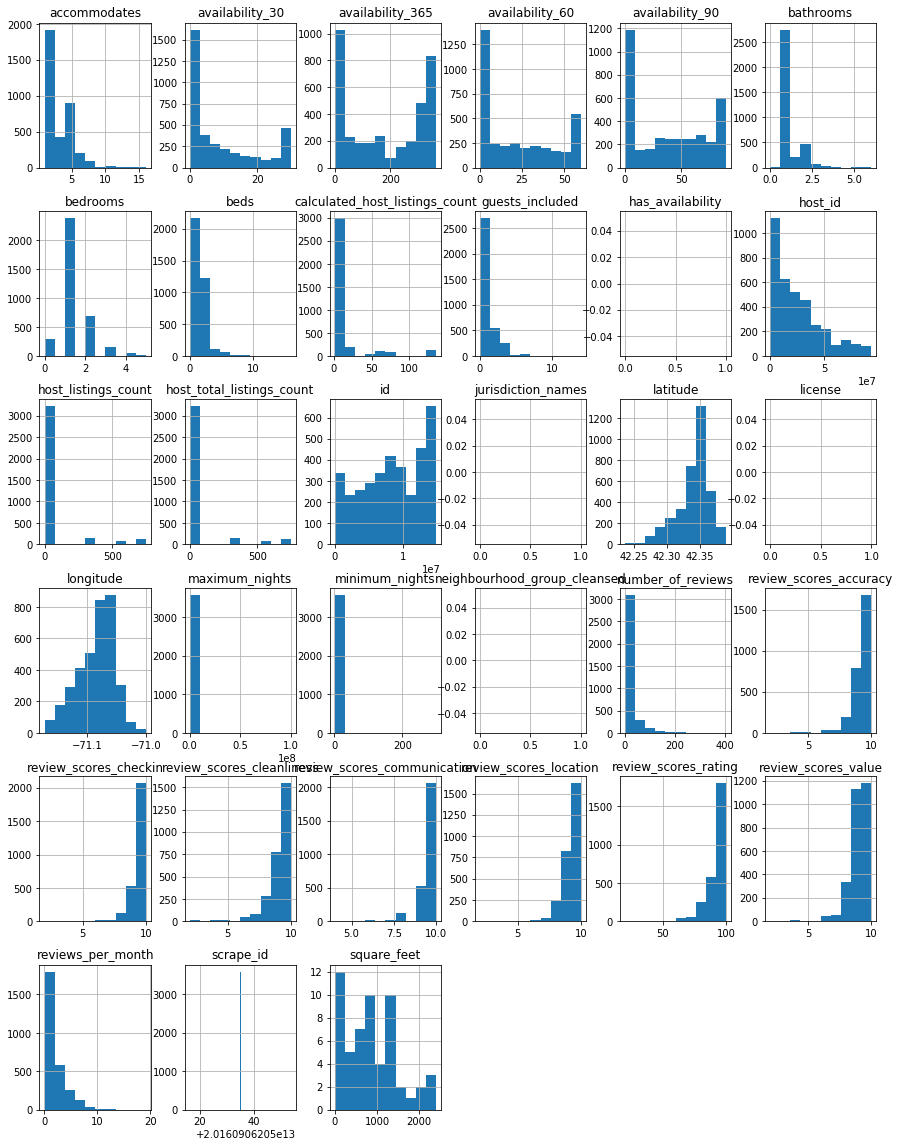

In [7]:
#plotting a histgram to quickly visualise the data
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
listing_df.hist(ax = ax);

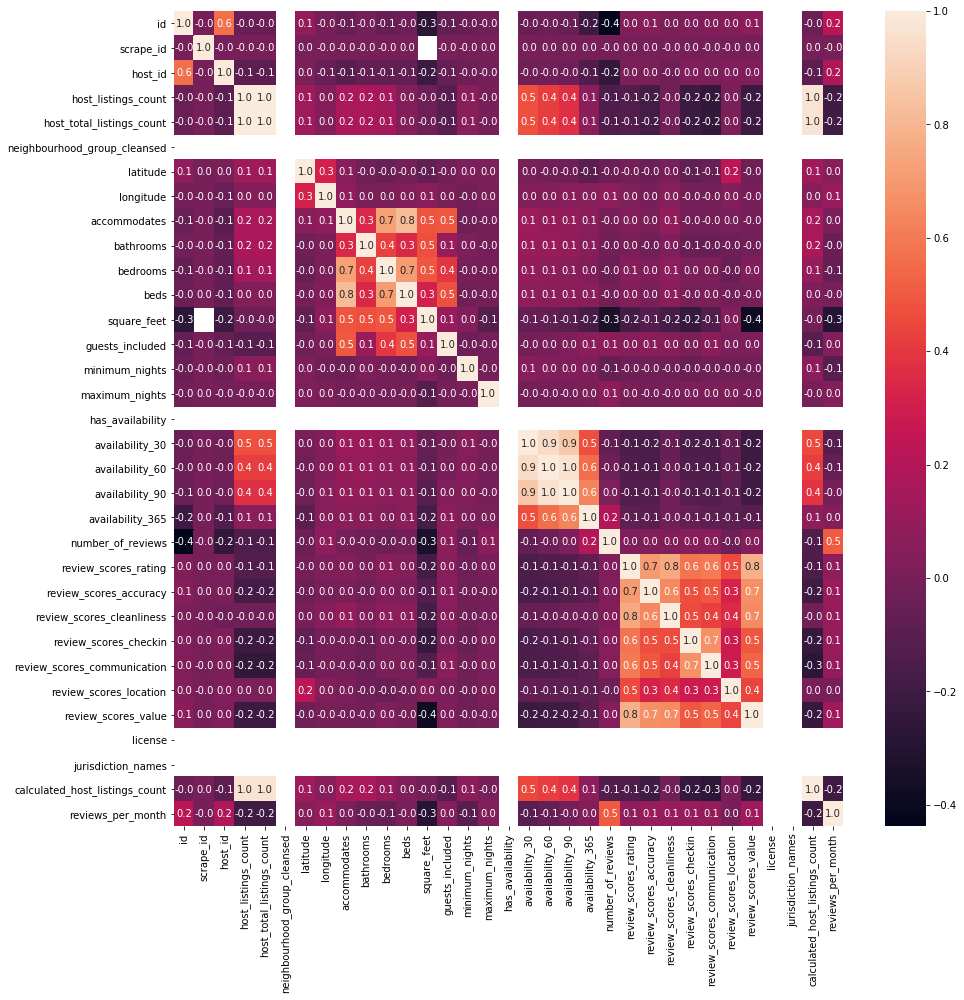

In [8]:
#building a heatmap for correlation visualisaton
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(listing_df.corr(), annot=True, fmt='.1f', ax=ax);

## Notes

Considering the above quick analysis/visualisation, we can see that many variables out of 95 are not helpful at all, some have only single value that is exactly the same to all entries (i.e. 'scrape_id','last_scraped') , some are not relevant (i.e. 'city', as we know it is Boston, or 'name', 'summary' and 'description' - these variables that have 0 missing values but they do not bring any value to our anaysis), and some have missing values that are more than an acceptable treshold(i.e.'cleaning_fee'or 'monthly_price'), while we still could impute those missing values, however, in the cases with the values that will be dropped and imputation will not make any sense or add any value to our further analysis. 

After dropping tthe variiables that we will not use in the further data manipulation and prediction, we have left with 26 coluumns instead of 95. Now lets look closer to the chosen variables. 

In [3]:
#Feature selection for predictive modeling

#columns that will bring no value in analytics nor prediction will be dropped out ofthe dataset: scrape_id is an id that is of a single value for all entries, the same as the scrape date. 
listing_df_subset = listing_df.drop(['scrape_id', 'listing_url', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_url', 'host_name', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate','host_thumbnail_url', 'host_picture_url', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'host_neighbourhood', 'neighbourhood','neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country',       
 'is_location_exact', 'square_feet', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee','extra_people','calendar_updated', 'has_availability', 'availability_60', 'availability_90','calendar_last_scraped', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'requires_license', 'license', 'jurisdiction_names', 'instant_bookable', 'require_guest_profile_picture', 'require_guest_phone_verification'], axis=1)

#all columns that left after drop, create a subset 
listing_df_subset.shape

(3585, 27)

In [4]:
listing_df_subset.columns

Index(['id', 'host_id', 'host_since', 'host_is_superhost',
       'host_listings_count', 'neighbourhood_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'bed_type', 'amenities', 'price', 'guests_included',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_365', 'number_of_reviews', 'review_scores_value',
       'cancellation_policy', 'calculated_host_listings_count',
       'reviews_per_month'],
      dtype='object')

In [5]:
listing_df_subset.dtypes

id                                  int64
host_id                             int64
host_since                         object
host_is_superhost                  object
host_listings_count                 int64
neighbourhood_cleansed             object
latitude                          float64
longitude                         float64
property_type                      object
room_type                          object
accommodates                        int64
bathrooms                         float64
bedrooms                          float64
beds                              float64
bed_type                           object
amenities                          object
price                              object
guests_included                     int64
minimum_nights                      int64
maximum_nights                      int64
availability_30                     int64
availability_365                    int64
number_of_reviews                   int64
review_scores_value               

# Reviews Dataset

In [7]:
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [15]:
reviews_df.dtypes

listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object

In [8]:
#Removing the name, as the names are not unique values
reviews_df_subset = reviews_df.drop(['reviewer_name'], axis = 1) 

In [17]:
#number of reviews for each listing 
reviews_df.groupby(['listing_id']).agg({'comments':'count'})

,comments
listing_id,
3353,34
5506,36
6695,47
6976,41
8792,18
...,...
14813006,1
14823724,1
14842237,1


In [18]:
#double-check with the listing file
listing_df_subset.groupby(['id']).agg({'number_of_reviews':'sum'})

,number_of_reviews
id,
3353,34
5506,36
6695,47
6976,41
8792,18
...,...
14924831,0
14928000,0
14928333,0


### Notes

So everything matches apart from that the listing count, the listing file has properties with 0 reviews (756) that obviously are not included into the review file.

# Calendar Dataset

In [19]:
calendar_df.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [20]:
calendar_df.shape

(1308890, 4)

## Cleaning the DATA

Despite the fact that I have left only relevant columns, it is still difficult to visualise/analyse those due to i.e. wrong data type of the particular column. While trying to plot quick hsitogram with left variables, I have faced an issue that for instance prices wouldnt plot and the main reason behind that is that the price column represented as an object data type instead of numeric (int or float). Therefore it was decided to clean and tranform each feature before proceeding with the further analytics. 

In [7]:
# Cleaning and Transformation of the features 

# Convert string of prices to floats
listing_df_subset.price=listing_df_subset.price.str.replace('$','')
listing_df_subset.price=listing_df_subset.price.str.replace(',','').astype(float)

calendar_df.price = calendar_df.price.str.replace('$','')
calendar_df.price = calendar_df.price.str.replace(',','').astype(float)

# Convert date string to datetime
listing_df_subset['host_since'] = pd.to_datetime(listing_df_subset['host_since'], format='%Y-%m-%d')
reviews_df['date'] = pd.to_datetime(reviews_df['date'], format='%Y-%m-%d')
calendar_df['date'] = pd.to_datetime(calendar_df['date'], format='%Y-%m-%d')

#Convert object to categorical variable

listing_df_subset.host_is_superhost=listing_df_subset.host_is_superhost.astype('category')
listing_df_subset.neighbourhood_cleansed = listing_df_subset.neighbourhood_cleansed.astype('category')
listing_df_subset.property_type = listing_df_subset.property_type.astype('category')
listing_df_subset.room_type = listing_df_subset.room_type.astype('category')
listing_df_subset.bed_type = listing_df_subset.bed_type.astype('category')
listing_df_subset.cancellation_policy = listing_df_subset.cancellation_policy.astype('category')

#remove all non-letter characters from amenities column
import re 

sc_sub = re.compile('\W+')
listing_df_subset['amenities'] = [sc_sub.sub(' ', amenity) for amenity in listing_df_subset['amenities']]

In [22]:
listing_df_subset.dtypes

id                                         int64
host_id                                    int64
host_since                        datetime64[ns]
host_is_superhost                       category
host_listings_count                        int64
neighbourhood_cleansed                  category
latitude                                 float64
longitude                                float64
property_type                           category
room_type                               category
accommodates                               int64
bathrooms                                float64
bedrooms                                 float64
beds                                     float64
bed_type                                category
amenities                                 object
price                                    float64
guests_included                            int64
minimum_nights                             int64
maximum_nights                             int64
availability_30     

## Initial findings

After performing some transformation tecniques on our data, we can now plot the histogram and the correlation matrix to see if things have changed. So from below plots and heatmap we can see that:

- there is a clear correlation between the number of bedrooms, beds and the number of guests the property can fit. 
- prices appeared both at histogram and correlation heatmap. 
- majority of airbnbs are small properties/rooms (we will dig deeper into this later)
- majority of airbnbs are short term let
- mojaority of hosts are a single property owners, however, there are few hosts that own more than one property, which could be biased in the price setting across the area. 
- the main range of prices are up to $700, which cerates outliers (we will lokk at this closely later on)

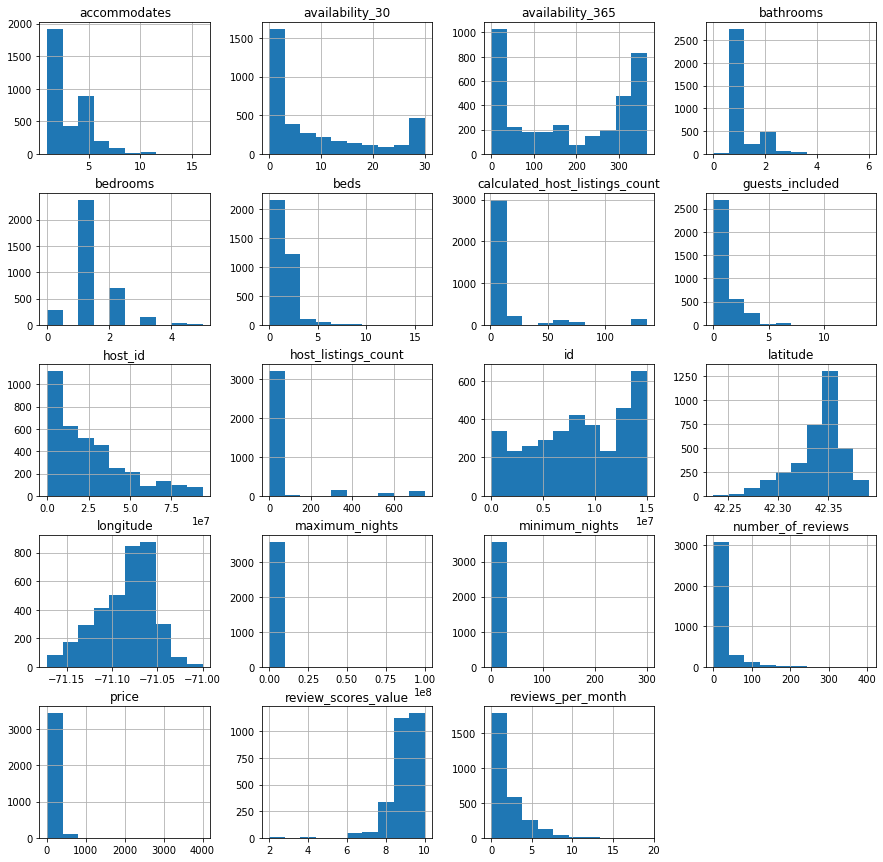

In [23]:
listing_df_subset.hist(figsize=(15,15));

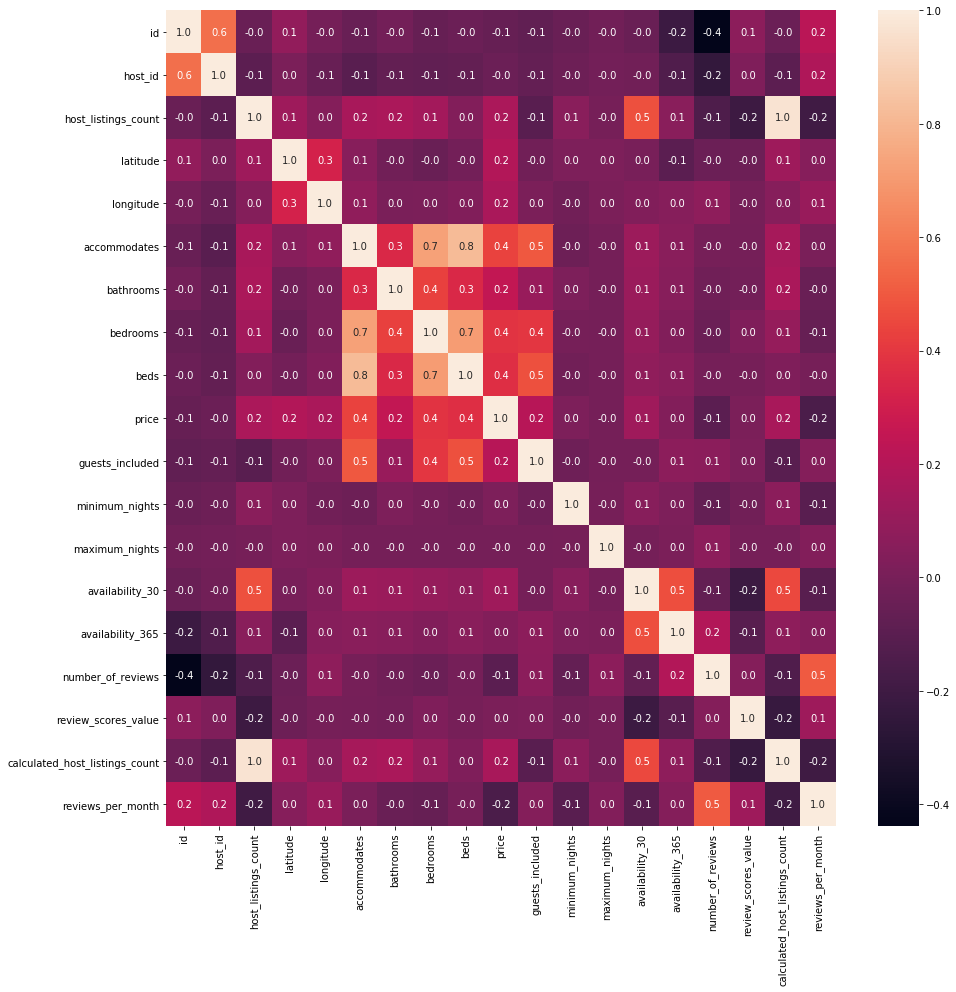

In [24]:
#building a heatmap for correlation visualisaton
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(listing_df_subset.corr(), annot=True, fmt='.1f', ax=ax);

# Missing Values

In [8]:
(listing_df_subset.isna().sum()/len(listing_df_subset))*100

id                                 0.000000
host_id                            0.000000
host_since                         0.000000
host_is_superhost                  0.000000
host_listings_count                0.000000
neighbourhood_cleansed             0.000000
latitude                           0.000000
longitude                          0.000000
property_type                      0.083682
room_type                          0.000000
accommodates                       0.000000
bathrooms                          0.390516
bedrooms                           0.278940
beds                               0.251046
bed_type                           0.000000
amenities                          0.000000
price                              0.000000
guests_included                    0.000000
minimum_nights                     0.000000
maximum_nights                     0.000000
availability_30                    0.000000
availability_365                   0.000000
number_of_reviews               

In [9]:
#categorical data imputation
fill_mode = lambda col: col.fillna(col.mode()[0])
listing_df_subset['property_type']=listing_df_subset[['property_type']].apply(fill_mode, axis = 0)

#numeric data imputation
fill_mean = lambda col: col.fillna(col.mean())
listing_df_subset[['bathrooms', 'bedrooms', 'beds', 'review_scores_value','reviews_per_month']] = listing_df_subset[['bathrooms', 'bedrooms', 'beds', 'review_scores_value','reviews_per_month']].apply(fill_mean, axis = 0)

In [30]:
listing_df_subset.property_type = listing_df_subset.property_type.astype('category')

In [32]:
(reviews_df_subset.isna().sum()/len(reviews_df_subset))*100

listing_id     0.000000
id             0.000000
date           0.000000
reviewer_id    0.000000
comments       0.077627
dtype: float64

In [33]:
(calendar_df.isna().sum()/len(calendar_df))*100

listing_id     0.000000
date           0.000000
available      0.000000
price         50.871578
dtype: float64

In [9]:
#dropping the rows with missing variables, as comments cannot be imputed, the same as prices. 
reviews_df_subset = reviews_df_subset.dropna()
calendar_df = calendar_df.dropna()

## Notes

As you can see, only certain values were imputed. This time only those that were related to the file listing. Datasets with reviews had missing value in the 'comment' column, which cannot be imputed as it has to has unique values, hence it was decided to drop the rows with missing values out of the dataset. The same approach was used towards the feature PRICE in the 'calendar' dataset.  

## Data Analysis and main highlights

Since all data that will be used further is cleaned, transformed and imputed, now we are ready to proceed to the next steps, visualising our data, comparing the data, and do everything to help answer our business questions. Once all questions are answered that do not require ML algorithms here, we will proceed to answer the questions that need prediction techhniques. 

# Q1.The most popular listing by room type in Boston

### Market Share by room type

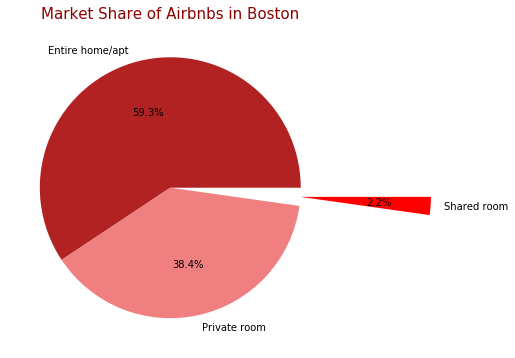

In [35]:
#plot of Market Share in Boston 
labels = listing_df_subset.room_type.value_counts().index
colors = ['firebrick', 'lightcoral', 'r']
explode = [0,0,1]
sizes = listing_df_subset.room_type.value_counts().values

plt.figure(0,figsize = (7,6))
plt.pie (sizes, explode = explode, labels = labels, colors = colors, autopct = '%1.1f%%')
plt.title ('Market Share of Airbnbs in Boston', color = 'darkred', fontsize = 15)
plt.show()

#### Findings

From the pie chart above we are able to see that the market is split between hosts that list entire home/apartment and those that rent out private rooms in their own homes/apartments. This shows us the most listed room type in Boston among the host. However, the property type is also in importance while choosing the Airbnbs, as it also suggests extra space and privacy in larger accomodations such as houses or apartment. 

Therefore, below is the breakdown of numbers of each room type in each property type that is listed at Airbnb. 

In [245]:
listing_df_subset.groupby(['property_type', 'room_type']).agg({'id':'count'})

id
property_type   room_type            
Apartment       Entire home/apt  1766
                Private room      787
                Shared room        62
Bed & Breakfast Entire home/apt     2
                Private room       38
                Shared room         1
Boat            Entire home/apt    10
                Private room        2
                Shared room         0
Camper/RV       Entire home/apt     1
                Private room        0
                Shared room         0
Condominium     Entire home/apt   150
                Private room       79
                Shared room         2
Dorm            Entire home/apt     0
                Private room        2
                Shared room         0
Entire Floor    Entire home/apt     2
                Private room        2
                Shared room         0
Guesthouse      Entire home/apt     1
                Private room        0
                Shared room         0
House           Entire home/apt   148
                Private room      405
                Shared room         9
Loft            Entire home/apt    29
                Private room        8
                Shared room         2
Other           Entire home/apt     2
                Private room       11
                Shared room         4
Townhouse       Entire home/apt    14
                Private room       40
                Shared room         0
Villa           Entire home/apt     2
                Private room        4
                Shared room         0

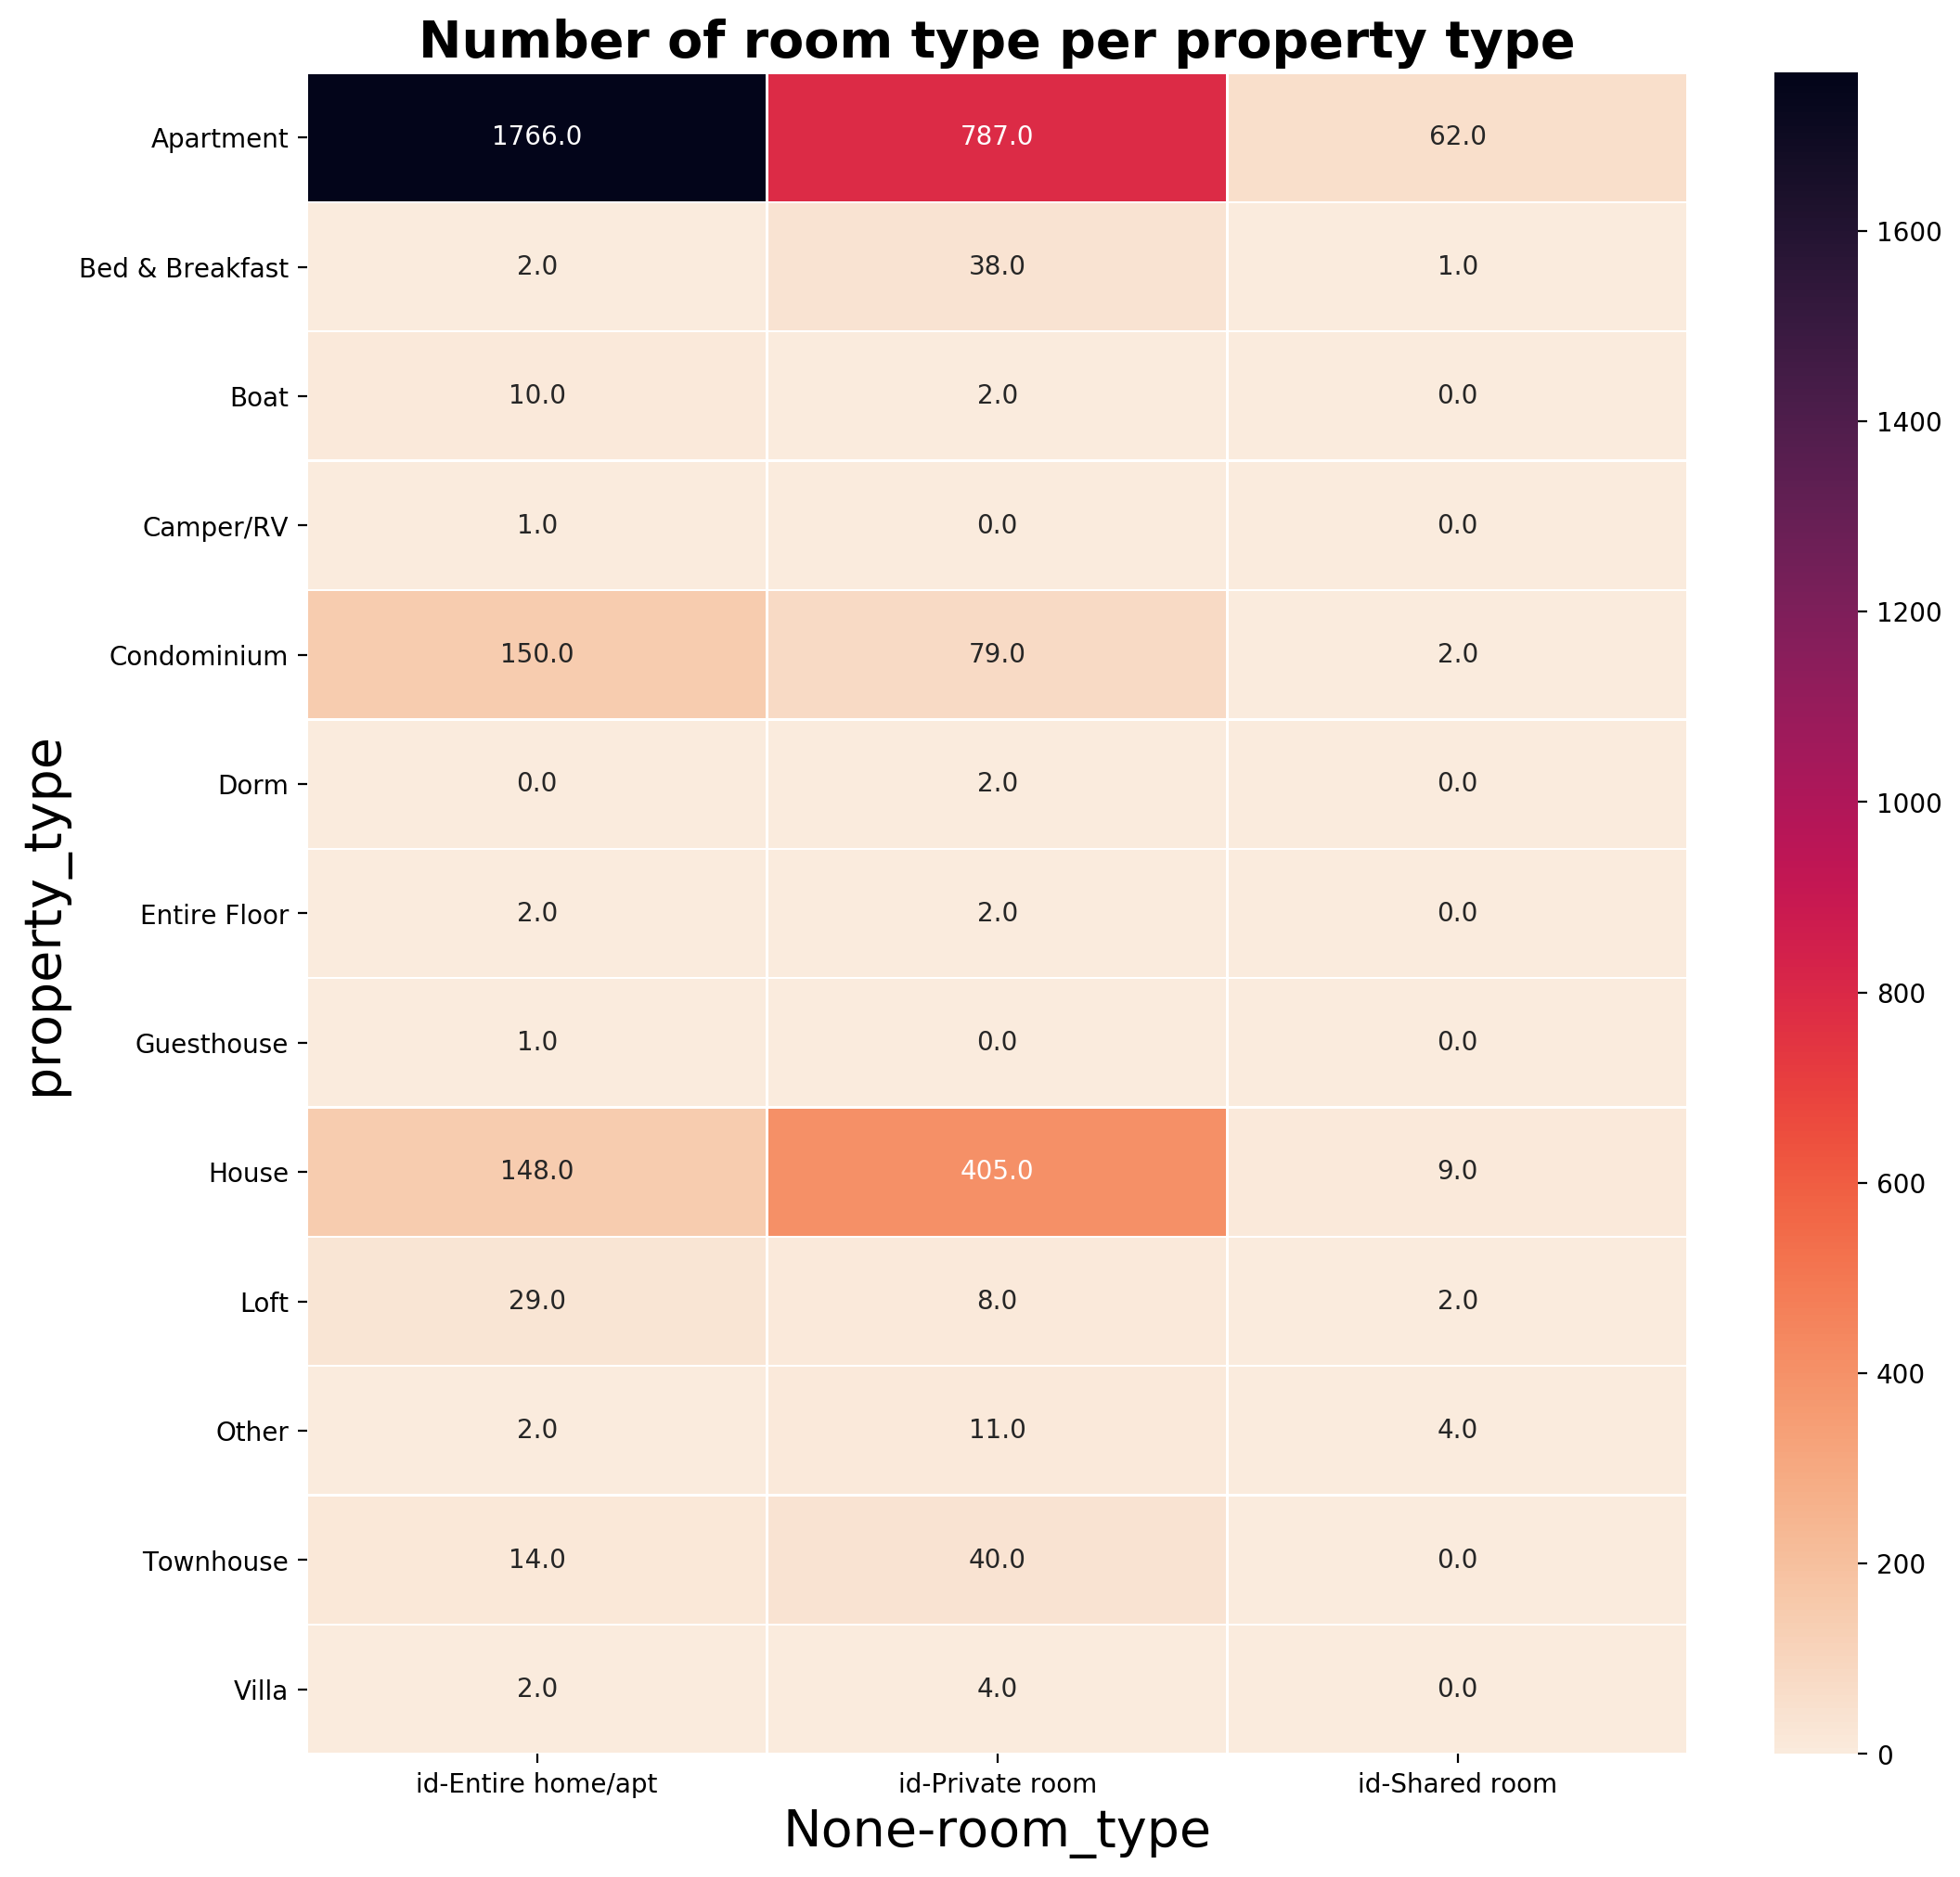

In [268]:
plt.figure(figsize=(12,12), dpi=200)
plt.title('Number of room type per property type', weight ='bold', size = 20);
plt.xlabel('room_type', size = 20)
plt.ylabel('property_type', size = 20)
sns.heatmap(listing_df_subset.groupby(['property_type','room_type']).agg({'id':'count'}).unstack(), annot=True, fmt='.1bf', linewidths= .5, cmap='rocket_r')

#### Findings 2

From the heatmap above, we can easily see that among the all hosts in Boston, the majority are apartment owners, that rents it as a whole or a room in it. Let us see the price allocation among the property and room types below. 

### Price per room type

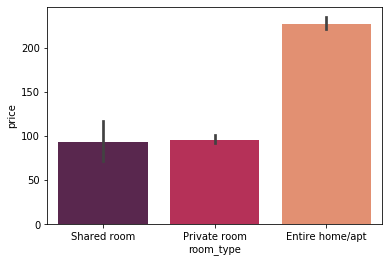

In [258]:
result = listing_df_subset.groupby(['room_type'])['price'].aggregate(np.median).reset_index().sort_values('price')
sns.barplot(x='room_type', y = 'price', data = listing_df_subset, order = result['room_type'], 
            palette='rocket')
plt.show()

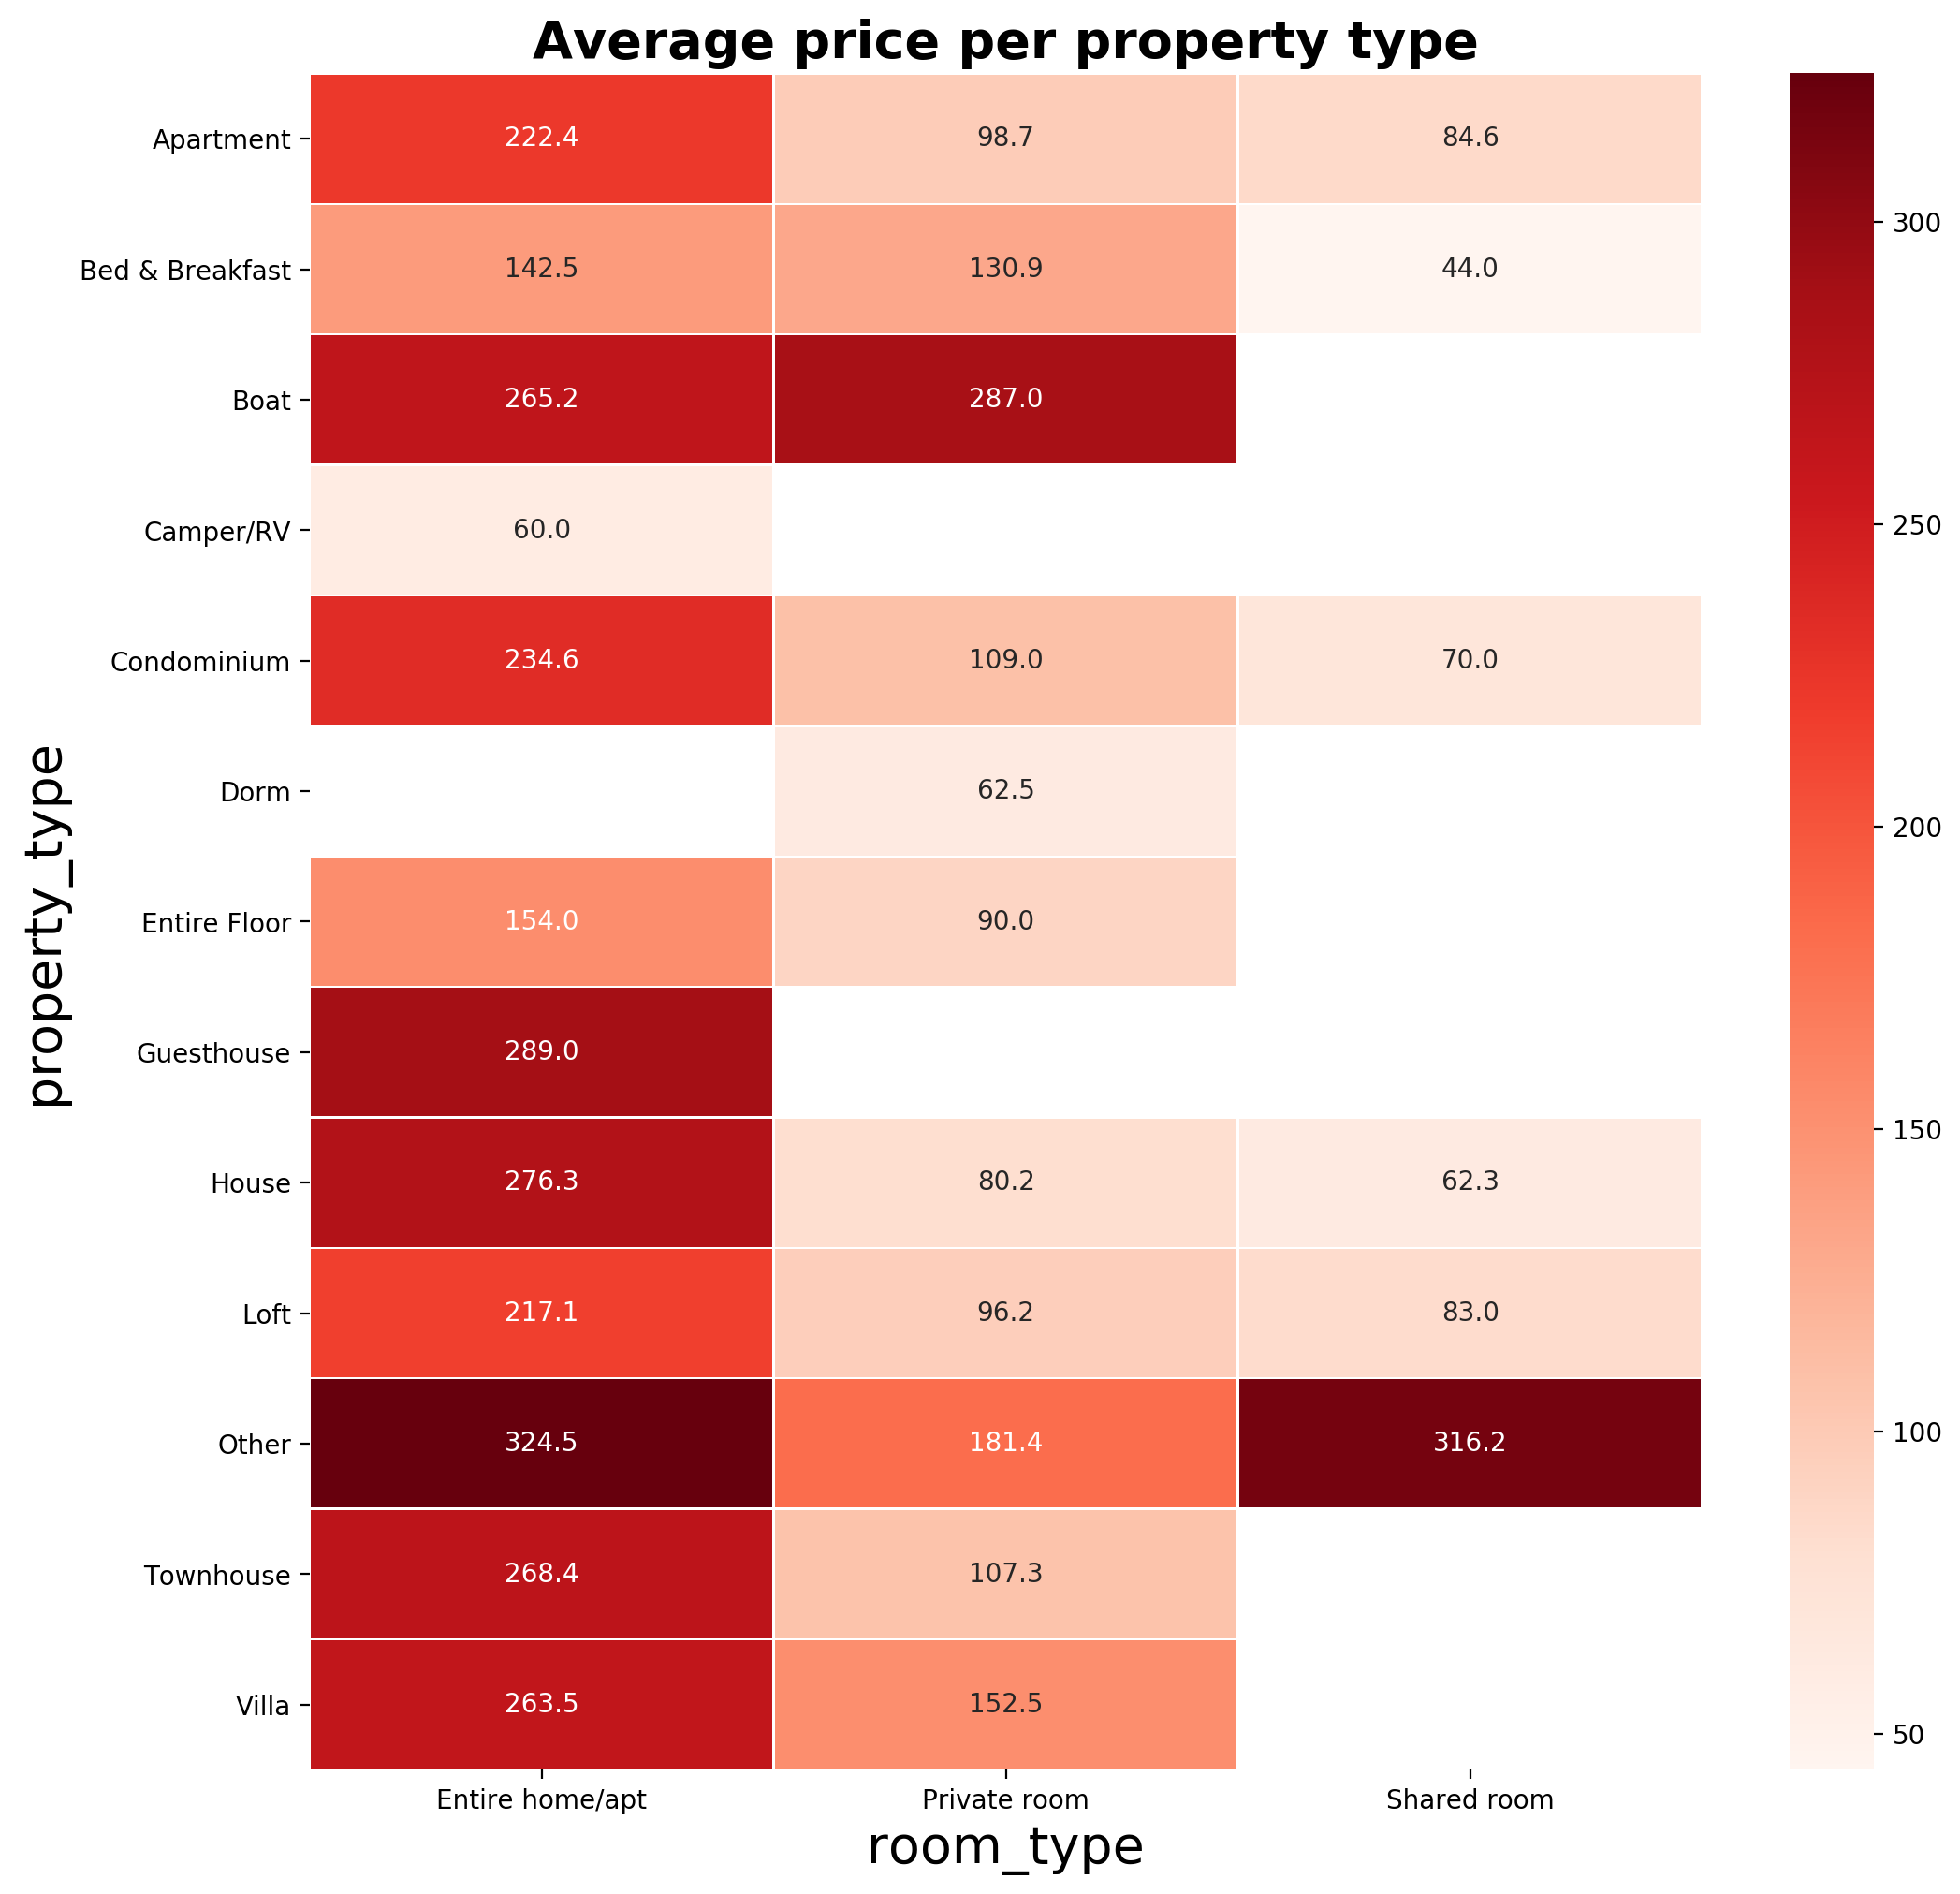

In [260]:
plt.figure(figsize=(12,12), dpi=200)
plt.title('Average price per property type', weight ='bold', size = 20);
plt.xlabel('room_type', size = 20)
plt.ylabel('property_type', size = 20)
sns.heatmap(listing_df_subset.groupby(['property_type','room_type']).price.mean().unstack(), annot=True, fmt='.1f', linewidths= .5, cmap='Reds')

#### Findings

From the heatmap above we can clearly see that entire home/apartment room type has a tendency of being average priced room type among the all property types that are given. However, from this heatmap we can see that that there are outliers in our price column (i.e. 'other' property type has a high average price for shared room). Let us have a look for the price column closely below, spot outliers and deal with those. 

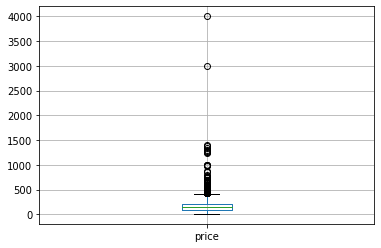

In [269]:
listing_df_subset.boxplot(column = ['price'])

In [270]:
#outliers
listing_df_subset.loc[listing_df_subset['price']>1500]

,id,host_id,host_since,host_is_superhost,host_listings_count,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,minimum_nights,maximum_nights,availability_30,number_of_reviews,review_scores_value,cancellation_policy,calculated_host_listings_count,reviews_per_month
2285,12972378,71380118,2016-05-10,f,1,Fenway,42.347934,-71.097580,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,TV Internet Wireless Internet Air Conditionin...,4000.0,2,6,1125,14,0,10.0,strict,1,1.0
3055,12679021,38001139,2015-07-09,f,1,South Boston Waterfront,42.348358,-71.039875,Apartment,Entire home/apt,4,2.0,2.0,2.0,Real Bed,TV Cable TV Wireless Internet Air Conditionin...,3000.0,1,1,1125,0,0,10.0,flexible,1,1.0


There are clear outliers seen at the boxplot at prices of 3000 and 4000, however, there are a series of outliers in a range of 1000 and 1500, which we cannot precisely spot. Lets have a more closer look at the price spread without outliers in the chart below. 

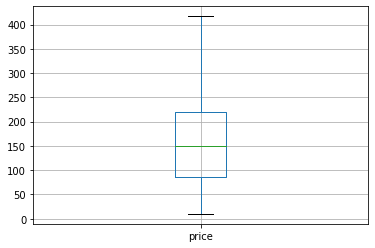

In [275]:
listing_df_subset.boxplot(column = ['price'], showfliers = False)

#### Findings

The boxplot above wwithout the most obvious outliers, shows a better price picture, we can see the following:

- prices start at 0 and goes up until 425;
- majority of the property priced in the range of 80 and 225
- median price is 150 

Taking into account that we have 116 rows of outliers (below), which makes it a 3.2% (116/3585) of the whole data set, considering that the price column is the column we will try to predict, the outliers will be removed from the dataset at the data modelling stage. 

In [284]:
len(listing_df_subset.loc[listing_df_subset['price']>425])

116

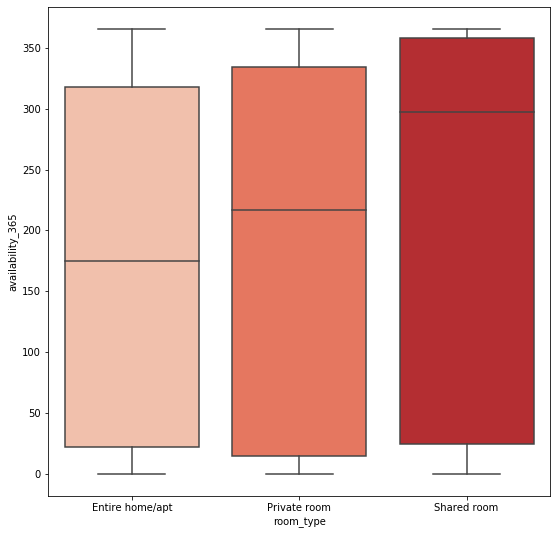

In [36]:
#plot
plt.figure(figsize = (9,9))
ax = sns.boxplot(data=listing_df_subset, x = 'room_type', y = 'availability_365', palette = 'Reds')

## Q1. KEY FINDINGS

As we can see from all of the above analysis the most popular listing on Airbnb is Entire Home/Appartment as:

- the availability of this category is just 175 days a year, while shared room availability is almost 300 days out of 365;
- it is the most common listing among all Airbnb listings having 59.3% market share
- given the price for this type of listing, it makes it affordable yet comfortable for living. 

# Q2.The most popular neighbourhood in Boston

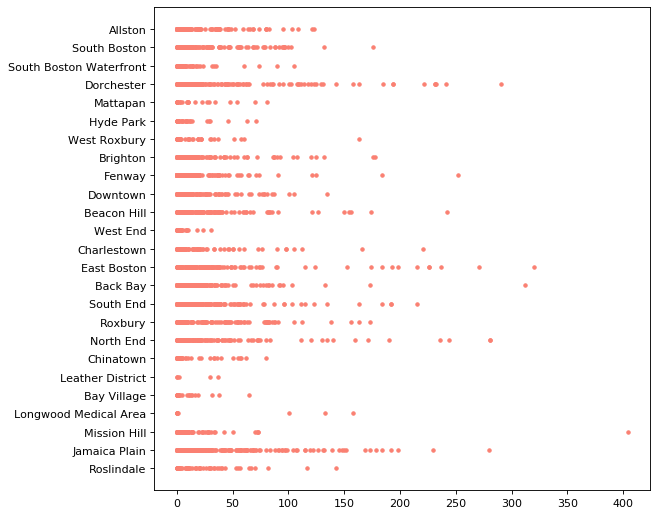

In [303]:
plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(listing_df_subset['number_of_reviews'], listing_df_subset['neighbourhood_cleansed'], c = 'salmon', marker = ".")
plt.show() 

The most popular neighbourhoods in Boston according to the number of the reviews left are the following:

- Mission Hill having the highest number of reviews left in amount of over 400;
- East Boston and Back Bay areas have reached nearly 350 and 310 reviews, respectively, which makes both the choice area #2;
- Areas such as Dorchester, Jamaica Plain and North End are positioned at the #3 areas of people's choices. 

The above findings are created based on the number of reviews in total, it does not reflectt only positive reviews, the main assumption here is that the more reviews left in one particular area means the popularity of this area among renters in Boston. 

Given the assumption, I would like to have another perspective on the matter and will look at the availability throughout the year of each neighbourhood as shown below.   

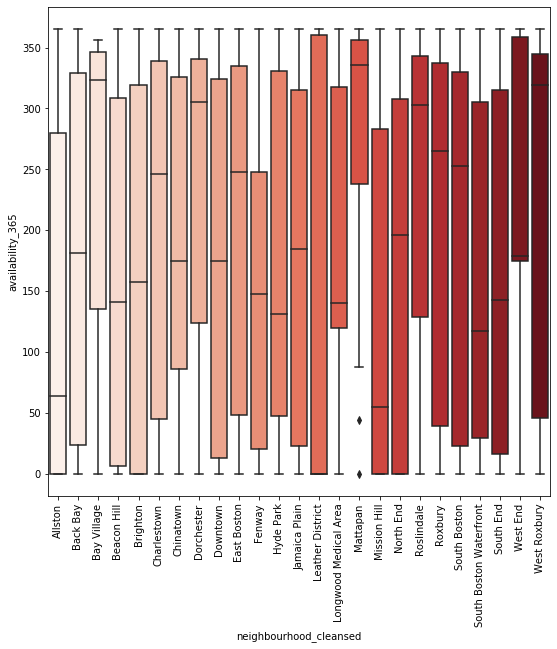

In [37]:
#plot
plt.figure(figsize = (9,9))
plt.xticks(rotation=90)
ax = sns.boxplot(data=listing_df_subset, x = 'neighbourhood_cleansed', y = 'availability_365', palette = 'Reds')

To back up the above findings, lets see the comparison with the annual availability of properties in each neighbourhood highligthed above:

- #1 Mission Hill 50/365 days
- #2 East Boston 250/365 and Back Bay 180/365  
- #3 Dorchester 300/365, Jamaica Plain 180/365 and North End 200/365 days 

The point is more or less proven, the Mission Hill area which has the highest number of reviews, shows also only 50 days availability throughout the year. While people's choice #2 and #3 have relatively high avalability, the number of reviews given at each area is relatively similar, which is also correlates with the availability. 

To make more sense out of the data, lets have a look at the least reviewed area and its availability correlation:

- Leather District (365/365) and it also has the lowest number of reviews, 50. 

It is helpful to see the prices in each neihbourhood too, to come up with the final conclusions. 

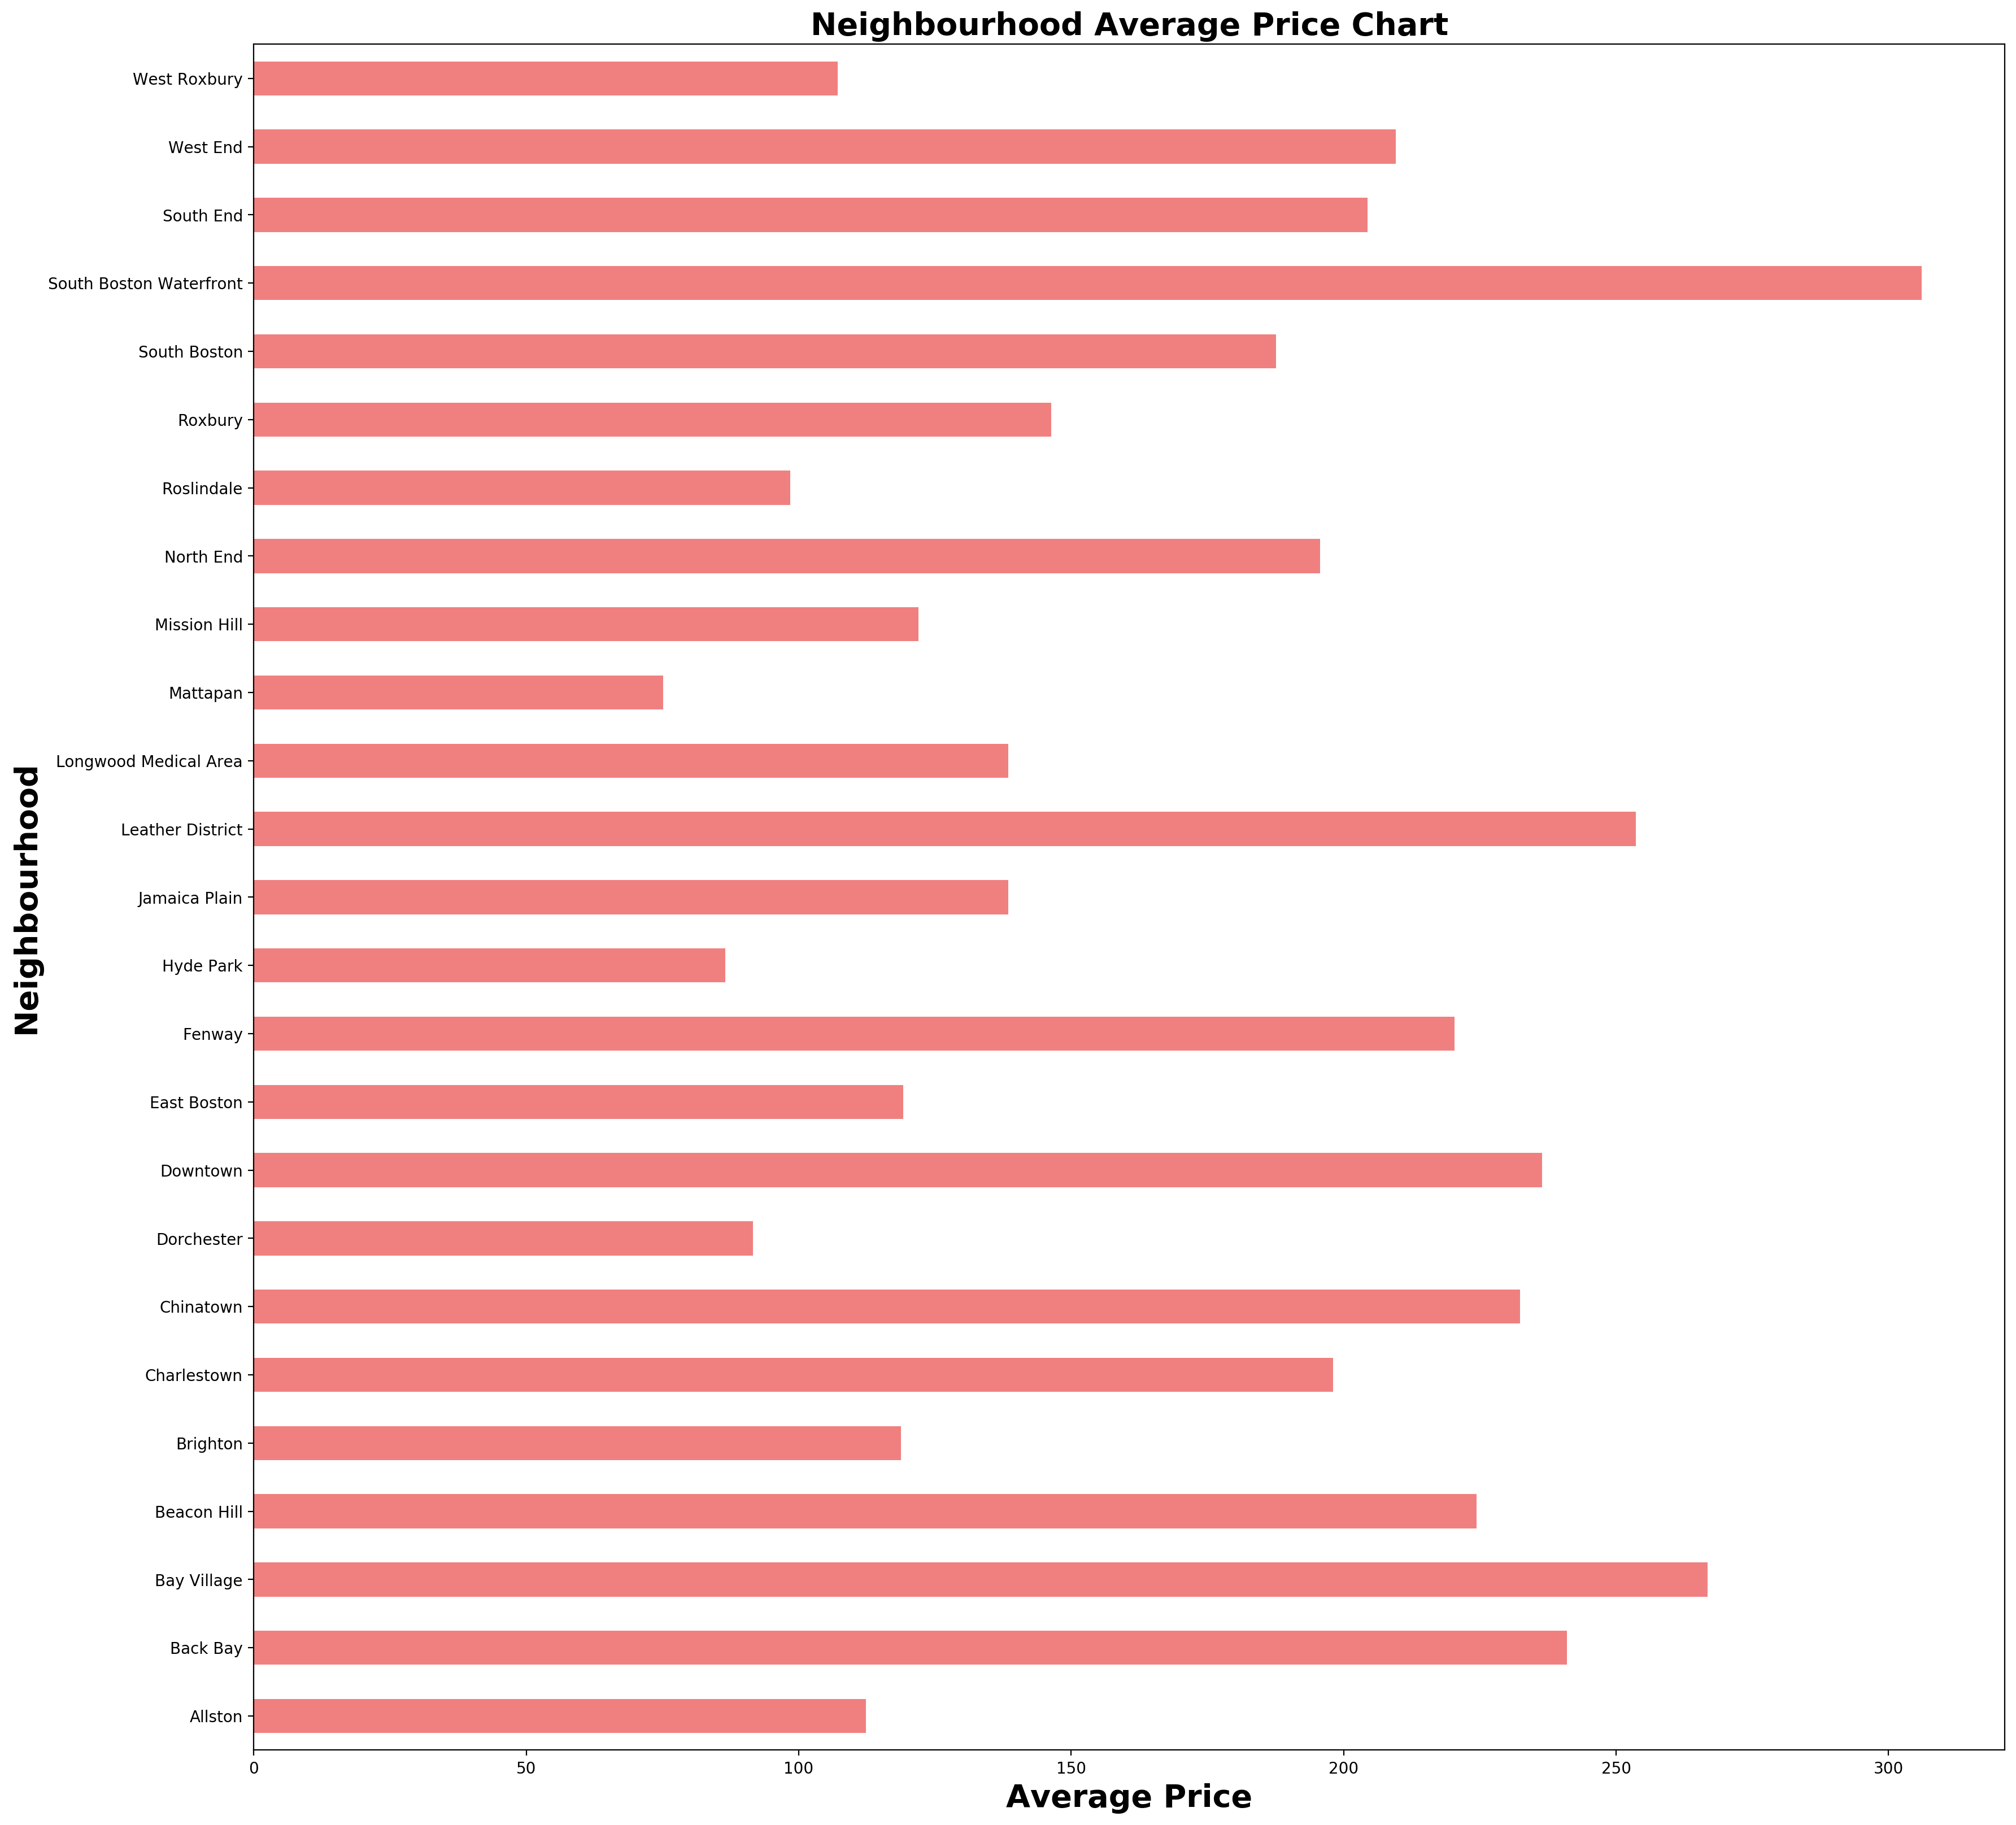

In [309]:
price_per_neighbourhood = listing_df_subset.groupby(['neighbourhood_cleansed']).price.mean()
plt.figure(figsize=(20,20), dpi=200);
price_per_neighbourhood.plot(kind='barh', color='lightcoral');
plt.xlabel('Average Price', weight='bold', size =20)
plt.ylabel('Neighbourhood', weight = 'bold', size =20)
plt.title('Neighbourhood Average Price Chart', weight ='bold', size = 20);

So, the price wise:

Highest:

- South Boston Waterfront, Bay Village and Leather District - are the most expensive areas to airbnb in Boston, which explains the lack of demand to these areas among renters and all is topped up with the small number of reviews. 

Our earlier picked top 3 areas:

- #1 Mission Hill has the average price of 120, which is more than twice cheaper the South Boston Waterfront, which makes the neighbourhood more attractive for visitors. 
- #2 East Boston has the same average price as Mission Hill, while and Back Bay are's average price is almost 250 per night
- #3 Dorchester is only 100 per night making it the cheapest area in Boston for visitors.

## Q2. KEY FINDINGS

Considering all of the above data analysis, the Mission Hill is the most popular neighbourhood in Boston among Airbnb renters, it is well explained with the amount of people leaving reviews, the average price and the annual availability. 

While the least popular area in Boston is Leather District, which has only 50 reviews against 400 of Mission Hill, having average price of 250 per night vs 120 of Mission Hill. 

# Step 4) Data Modelling

To answer the next questions we will need Machine Learning libraries, tools, and algorithms. This requires us to model our data first. 

 # Q3.Predicting the price
 
 As we remember, there were outliers in our price data, so, as it is our target value, we will drop the outliers to have a better dataset to train the model. 

In [27]:
#dropping rows with the outliers in price column (3469 left)
price_pred_dataset = listing_df_subset.loc[listing_df_subset['price']<426]

Since we will be predicting the price, we will need to handle non-numeric variables. In this case these are categorical variables, such as 'host_is_superhost', 'room_type' etc. 

We will use encoding approach to convert our categorical variables into numeric, so our ML model can process it for prediction purposes. 

In [28]:
#creating numerical categories for the features we will use for prediction purposes
price_pred_dataset['room_type'].replace(to_replace = ['Entire home/apt','Private room', 'Shared room'], value = [1,2,3], inplace = True)
price_pred_dataset['host_is_superhost'].replace(to_replace = ['t', 'f'], value = [1,0], inplace = True)

In [29]:
#dropping categorical variables of zero value to our prediction models
price_pred_dataset = price_pred_dataset.drop(['neighbourhood_cleansed', 'property_type','bed_type', 'cancellation_policy'], axis = 1)

Once the categocial variables dealt with, now we need to prepare the rest of the data for the model fitting. In our case the variable 'amenities' is the object variables, and could be dealt with the same approach as the categorical ones, however, the amenities column has more than one category for one entry, which will create extra 3000 new columns in our dataset with this approach. Therefore it was decided to drop this column. 

In [33]:
#drop amenities column
price_new_df = price_pred_dataset.drop(['amenities', 'host_since'], axis = 1)

In [37]:
#Last check before fitting the model
price_new_df.dtypes

id                                  int64
host_id                             int64
host_is_superhost                   int64
host_listings_count                 int64
latitude                          float64
longitude                         float64
room_type                           int64
accommodates                        int64
bathrooms                         float64
bedrooms                          float64
beds                              float64
price                             float64
guests_included                     int64
minimum_nights                      int64
maximum_nights                      int64
availability_30                     int64
availability_365                    int64
number_of_reviews                   int64
review_scores_value               float64
calculated_host_listings_count      int64
reviews_per_month                 float64
dtype: object

Since the goal is to build a model that can accurately predict the listing price based on the number of features, it is a spervised learning, hence we will try basic Linear regression model against more somphisticated ones below. 

#### Linear Regression

In [38]:
#Split into explanatory and response variables
from sklearn.preprocessing import scale

X = price_new_df.drop(['price', 'id', 'host_id'], axis = 1)
y = price_new_df['price']

In [39]:
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [40]:
lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [41]:
#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

In [42]:
#Score using your model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

In [43]:
#Print training and testing score
print("The rsquared on the training data is {}.  The rsquared on the test data is {}.".format(train_score, test_score))

The rsquared on the training data is 0.5817436308109698.  The rsquared on the test data is -28368.604368823428.


As we can see, the linear regression model performed poor on both training and test data. Lets try the Random Forest model below. 

#### Random Forest

In [51]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier as RFC
rfc_b = RFC()
rfc_b.fit(X_train,y_train)
y_pred = rfc_b.predict(X_train)
print('Train accuracy score:',accuracy_score(y_train,y_pred))
print('Test accuracy score:', accuracy_score(y_test,rfc_b.predict(X_test)))

Train accuracy score: 1.0
Test accuracy score: 0.16042267050912584


While train accuracy score seemed to be 'perfect' which means overfitted, we can easily spot on the test data that the model is not doing good. 

#### XGBoost

In [44]:
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score
from sklearn.model_selection import GridSearchCV

In [46]:
## convert the dataset into an optimized data structure called Dmatrix that XGBoost supports
data_dmatrix = xgb.DMatrix(data=X_train, label=y_train, feature_names=X_train.columns)

## parameter dictionary holder
params = []

## candidate parameters
max_depths = [3, 4, 5]
gammas = [0, 0.1, 0.5, 1, 5]
learning_rates = [0.05, 0.1, 0.5]
subsamples = [0.7, 0.8, 1]
reg_lambdas = [0.5, 1, 5, 10]
colsample_bytrees = [0.7, 0.8, 1]

## manually grid search cv
for max_depth in max_depths:
    for gamma in gammas:
        for learning_rate in learning_rates:
            for subsample in subsamples:
                for reg_lambda in reg_lambdas:
                    for colsample_bytree in colsample_bytrees:
                        ## define hyper parameters for xgbregressor
                        param = dict(max_depth=max_depth, 
                                           gamma=gamma, 
                                           learning_rate=learning_rate, 
                                           subsample = subsample, 
                                           reg_lambda=reg_lambda, 
                                           colsample_bytree=colsample_bytree)
                        ## retrieve cv results dataframe
                        cv_results = xgb.cv(dtrain=data_dmatrix, params=param, nfold=5,
                                            num_boost_round=50, early_stopping_rounds=20, 
                                            metrics="rmse", as_pandas=True, seed=(777*29)%10000)
                        cv_score = cv_results["test-rmse-mean"].iloc[-1]
                        ## append the score and parameters to params
                        params.append((cv_score, param))


## get best parameters that gives lowest validation rmse score
params = sorted(params, key=lambda x: x[0])
best_params = params[0][1]
best_valid_score = params[0][0]

## train the model with best parameters
xgb_reg = xgb.XGBRegressor(max_depth=best_params['max_depth'], gamma=best_params['gamma'], 
                           learning_rate=best_params['learning_rate'], subsample=best_params['subsample'], 
                           reg_lambda=best_params['reg_lambda'], colsample_bytree=best_params['colsample_bytree'], 
                           n_estimators = 100)
xgb_reg.fit(X_train, y_train)

## print out results
print("======= CV Result =======")
print("> best validation score: {:.4f}".format(best_valid_score))
print("> Best hyper parameters:")
print("  ", best_params)

[14:15:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
======= CV Result =======
> best validation score: 48.7809
> Best hyper parameters:
   {'max_depth': 5, 'gamma': 5, 'learning_rate': 0.1, 'subsample': 0.7, 'reg_lambda': 0.5, 'colsample_bytree': 0.7}


In [56]:
y_train_predict = xgb_reg.predict(X_train)
r2 = r2_score(y_train, y_train_predict)
print("> train r-squared: {:.4f}".format(r2))

> train r-squared: 0.8677


In [47]:
## predict
y_predict = xgb_reg.predict(X_test)

## evaluate on test data
r2 = r2_score(y_test, y_predict)
rmse = np.sqrt(mean_squared_error(y_test, y_predict))

print("======= Result =======")
print("> test r-squared: {:.4f}".format(r2))
print("> test RMSE: {:.4f}".format(rmse))

======= Result =======
> test r-squared: 0.7185
> test RMSE: 46.8949


As we can see above, the more sophisticated model performing way better on both train and test data. That is the recommended model for price prediction. 

In [57]:
## Let us see 10 random picked true price values and predicted price values
compare_df = pd.DataFrame({'y_test': y_test, 'y_predict': y_predict})
ind = np.random.choice(len(compare_df), 10, replace=False)
compare_df.iloc[ind]

,y_test,y_predict
333,150.0,172.626694
1506,176.0,194.365143
2569,65.0,79.349869
3451,70.0,74.917595
907,150.0,166.943527
1272,199.0,179.147064
2951,38.0,50.043575
1944,175.0,164.839569
1200,106.0,137.372696
1112,99.0,141.612427


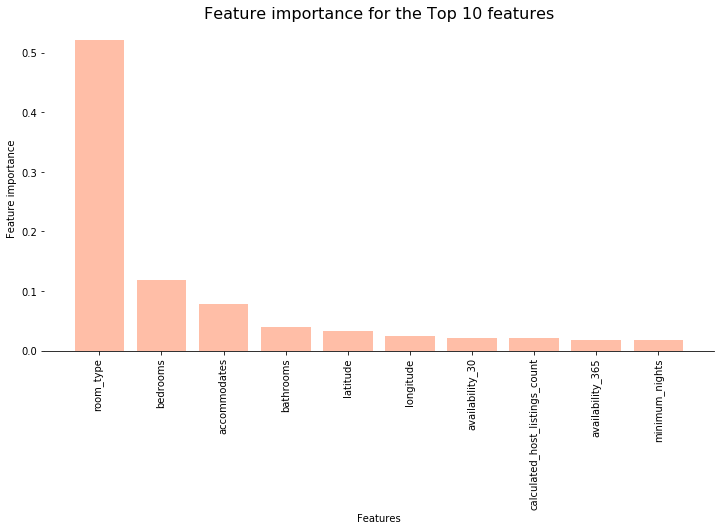

In [59]:
## visualize it
features = sorted(zip(xgb_reg.feature_importances_, X_train.columns), reverse=True)
attr = []
coef = []
number = 10

for feature in features:
    attr.append(feature[1]) 
    coef.append(feature[0])

plt.figure(figsize=(12,6))
ax = plt.subplot()
ax.bar(attr[:number], height=coef[:number], color='coral', alpha=0.5)
sns.despine(top=True, right=True, left=True)
ax.xaxis.grid(False)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Feature importance')
plt.title('Feature importance for the Top {} features'.format(number), fontsize=16)
plt.show()

## print features
#print("Top {} important features:\n {}".format(number, attr[:number]))

# Q3. KEY FINDINGS

We have found that the most important feature in price prediction is the type of the room of the listing, following with the number of bedroom and the capacity of the place advertised. 